#**Perspective**
In this report , we have an image from one poistion with specific angle, and our goal is to find the corresponding image from top down view . in the following we explain how to reach that goal in details . 

##**Show original Logo**

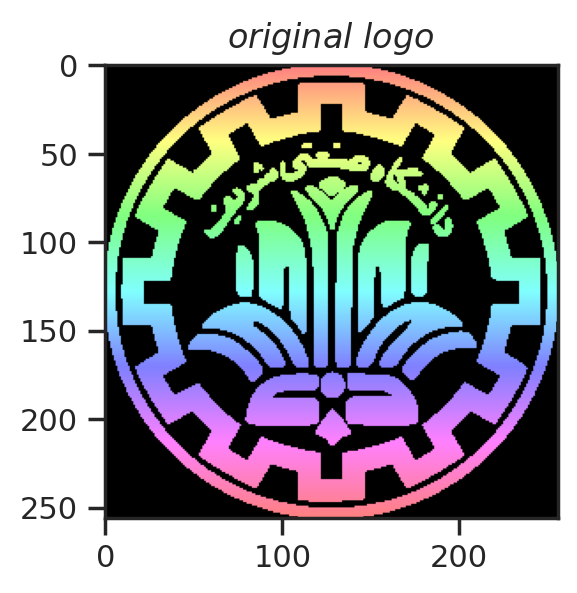

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

logo=np.array(cv2.imread("logo.png"))
logo=cv2.cvtColor(logo, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(3, 3))
plt.imshow(logo.astype(np.uint8))
plt.title(r"$original \ logo$")
plt.show()

##**Analyze the question more precisely**
below you can see the soccer feild from the front view : 





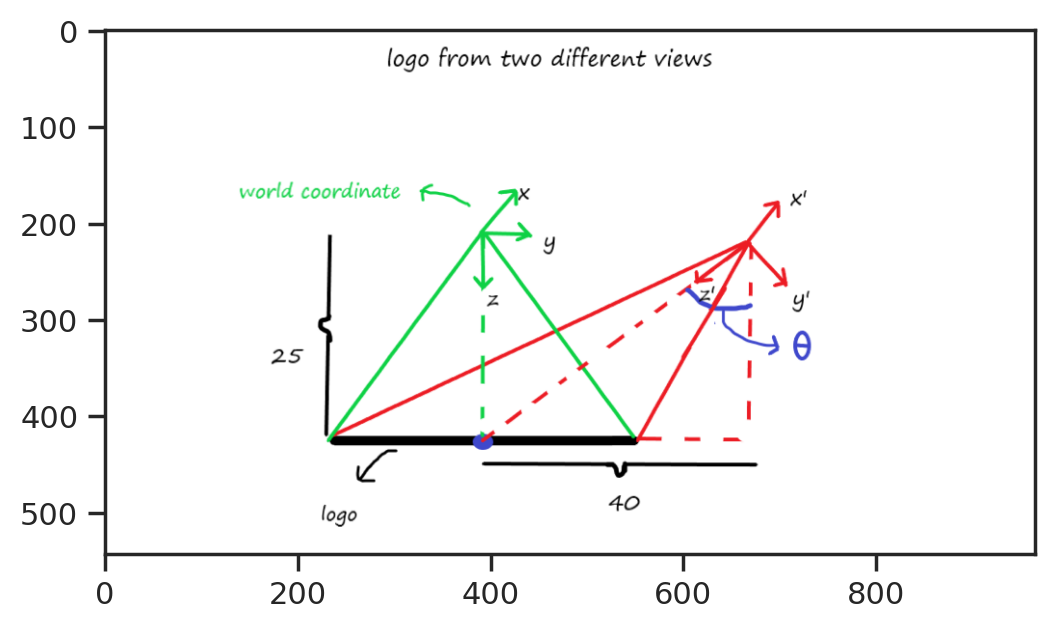

In [ ]:
img=plt.imread("/content/1.PNG")
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.show()

as we can see , we have two changes in the second camera(red one) poistion :

* we have 40m movment on the possitive y axis

* we have a rotation that is equal to $\theta$ degree around x axis 


##**How to reach a straightforward formula between two image from different view?**

we now that we can use following formula to map 3d spacae coordinate to 2d image pixels :

$x=K[R|t]X$ , where :

$x:coordinates \ of \ 2D \ image \ pixels$ , 
$X:coordinates \ of \ 3D \ space$

$R:Rotation \ matrix \ with \ respect \ to \ world \ coordinate$

$T:Translation \ matrix \ with \ respect \ to \ world \ coordinate$

so for two cameras we can write following equations :

$x_{cam \ 1}=K_{cam \ 1}[R_{cam \ 1}|t_{cam \ 1}]X \ \ , \ Eqation(1.1)$ 

$x_{cam \ 2}=K_{cam \ 2}[R_{cam \ 2}|t_{cam \ 2}]X \ \ , \ Eqation(1.2)$ 


now suppose that all these matrix are invertible( they are not actually but we will handle this problem later), so we have : 

$X={[R_{cam \ 1}|t_{cam \ 1}]}^{-1}K^{-1}_{cam \ 1}x_{cam \ 1} \ \ , \ Eqation(1.3)$ 

if we replace $Eqation(1.3)$  in $Eqation(1.2)$ we have :  

$\boxed{x_{cam \ 2}=K_{cam \ 2}[R_{cam \ 2}|t_{cam \ 2}]{[R_{cam \ 1}|t_{cam \ 1}]}^{-1}K^{-1}_{cam \ 1}x_{cam \ 1}  \ \ , \ Eqation(1.4)}$ 

$Eqation(1.4)$ is the straightforward formula between two camera. we will use this equation to reach homography matrix and then warp the origianl logo to get final image  

##**How to compute R , T and K matrix ?**

* $Translation \  matrix$ =$T$ =$\begin{bmatrix}
t_{x}\\
t_{y}\\ 
t_{z}
\end{bmatrix}$ where each component is movment with respect to positive $x,y,z$ axis , so in this question according to above figure , we just have translation in $+y$ axis (40 meter) so out translation matrix in this question is like below :

$T$ =$\begin{bmatrix}
0\\
+40\\ 
0
\end{bmatrix}$

* note that we assume that the camera from top down view is world coordinate

* $Rotation \  matrix$ =$R$ =$\begin{bmatrix}
r_{11},r_{12},r_{13}\\
r_{21},r_{22},r_{23}\\ 
r_{31},r_{32},r_{33}
\end{bmatrix}$

to compute this matrix we refer to the image below : 



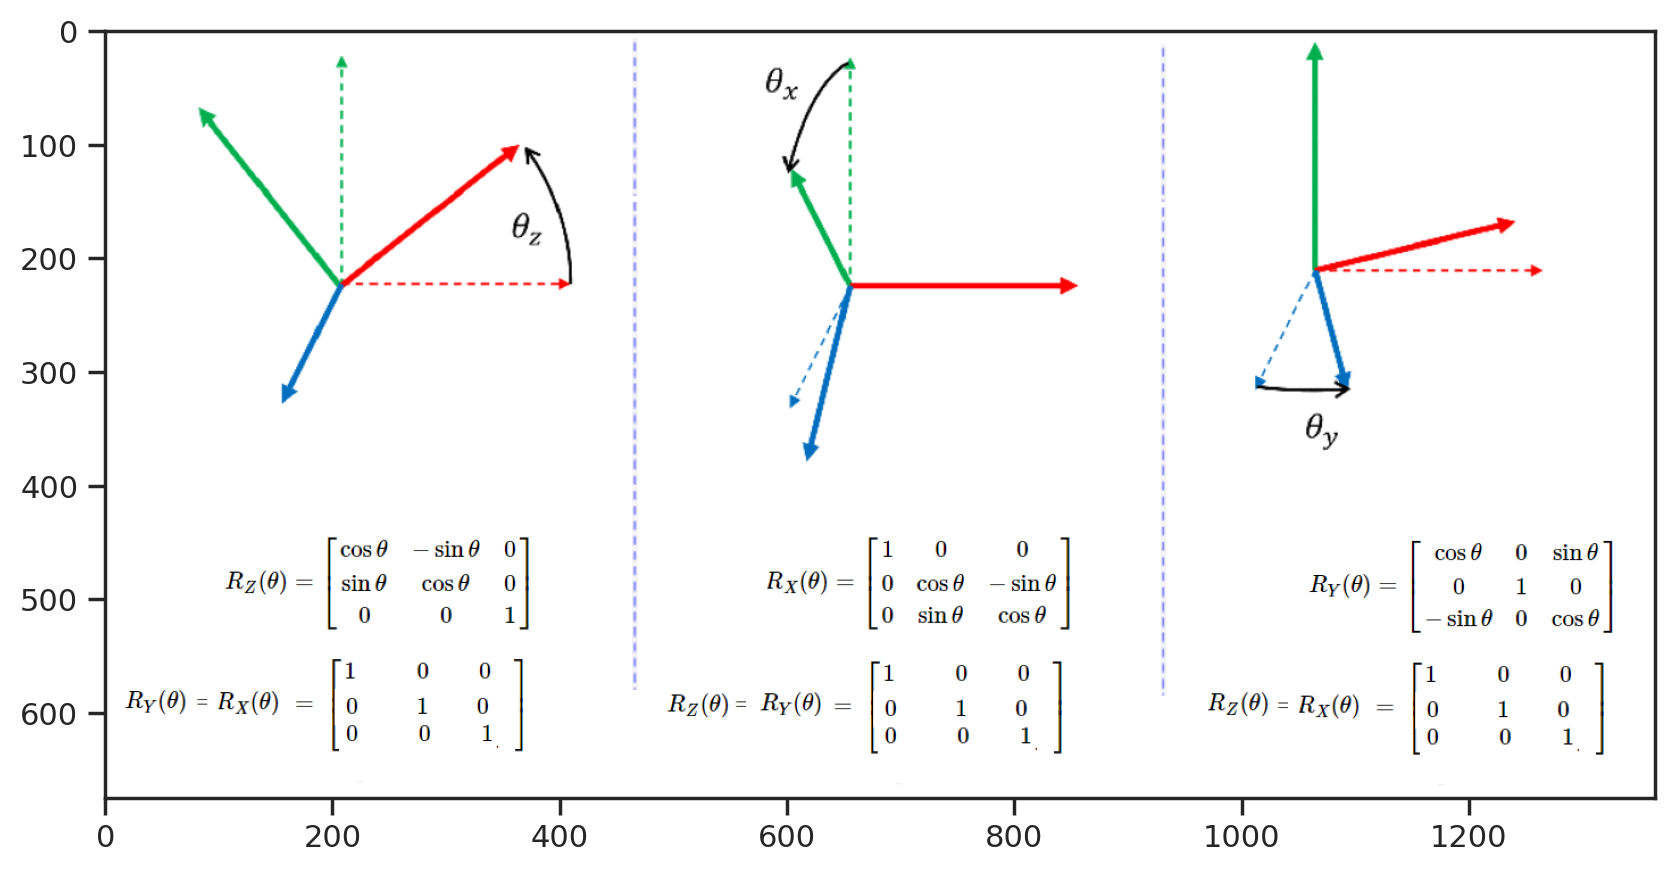

In [ ]:
img1=plt.imread("/content/2.PNG")
plt.figure(figsize=(10, 10))
plt.imshow(img1)
plt.show()

we know that the Rotation matrix can be reached by following formula : 

$Rotation \ matrix= R=R_{x}R_{y}R_{z} \ \ , \  Equation(1.5)$ 

so with the help of $Equation(1.5)$ and above image about roation we can make our rotation matrix . note that as we can see in the first image our rotation angle in this question is $\theta_{0}=tan^{-1}(\frac{width}{height})=tan^{-1}(40/25)$

so our roation matrix for this problem that we have rotation about $x$ axis is as below :

$R$ =$\begin{bmatrix}
1 \ \ \ , \ \ 0\ \ \ \ \ \ \ , 0\\
0,cos(\theta_{0}),-sin(\theta_{0})\\ 
0,sin(\theta_{0}),cos(\theta_{0})
\end{bmatrix}$



$calibration \ matrix=k=\begin{bmatrix}
f_{x} \ \ \ , \ \ \ 0 \ \  \ \ , \ \  p_{x}\\
0 \ \ \ , \ \ \ f_{y} \ \  \ \ , \ \  p_{y}\\ 
0 \ \ \ , \ \ \ 0 \ \  \ \ , \ \  1
\end{bmatrix}$



##**Are $T,R,K$ ... all sqaure matrices?**
as we said before $Equation(1.4)$ is a formula to reach final image. but we can use this formula if all matrices are square in order to have inverse. we can see that $[R_{cam \ 1}|T_{cam \ 1}]$ and $[R_{cam \ 2}|T_{cam \ 2}]$ are $(3,4)$ matrices. to make these two matrices invertible (square) : 

${we \ append \  [0,0,0,1]  \ wherever \ needed \ to \ make \ all \ matrices \ (4,4). \  to  \ say  \ this \ more \  percisely \ we \ have:}$

$T$ =$\begin{bmatrix}
1 \ ,  \ 0 \ , \ 0 , \ 0\\
0 \ ,  \ 1 \ , \ 0 , \ 40 \\ 
0 \ ,  \ 0 \ , \ 1 , \ 0\\ 
0 \ ,  \ 0 \ , \ 0 , \ 1
\end{bmatrix}$

$R$ =$\begin{bmatrix}
1 \ \ \ , \ \ 0\ \ \ \ \ \ \ , 0  \ \ \ \ , \ \  \ \ \ \ \ \ \ \ \ 0\\
0,cos(\theta_{0}),-sin(\theta_{0}) \ \ , \ 0 \\ 
0,sin(\theta_{0}),cos(\theta_{0}) \ \ , \ \ \ \ 0 \\
0 \ \ \ , \ \ 0\ \ \ \ \ \ \ , 0  \ \ \ \ , \ \  \ \ \ \ \ \ \ \ \ 1
\end{bmatrix}$

In [ ]:
focal_length=500
angle=-np.arctan(40/25)
hx,hy=logo.shape[:2]
px=hx/2
py=hy/2
K=np.array([[focal_length,0,px,0],[0,focal_length,py,0],[0,0,1,0]])
Kinv = np.zeros([4,3])
Kinv[:3,:3] = np.linalg.inv(K[:3,:3])*focal_length
Kinv[-1,:] = [0, 0, 1]
K=np.array([[focal_length,0,1000,0],[0,focal_length,1000,0],[0,0,1,0]])

In [ ]:
T = np.array([[1,0,0,0],
                    [0,1,0,40],
                    [0,0,1,0],
                    [0,0,0,1]])

RX = np.array([[1,           0,            0, 0],
                    [0,np.cos(angle),-np.sin(angle), 0],
                    [0,np.sin(angle),np.cos(angle) , 0],
                    [0,           0,            0, 1]])

RY = np.array([[ np.cos(0), 0, np.sin(0), 0],
                    [            0, 1,            0, 0],
                    [ -np.sin(0), 0, np.cos(0), 0],
                    [            0, 0,            0, 1]])

RZ = np.array([[ np.cos(0), -np.sin(0), 0, 0],
                    [ np.sin(0), np.cos(0), 0, 0],
                    [            0,            0, 1, 0],
                    [            0,            0, 0, 1]])

        # Composed rotation matrix with (RX,RY,RZ)
R = np.linalg.multi_dot([ RZ , RY , RX ])
RT_inverse=np.linalg.inv(np.dot(R,T))
homograpgy_matrix=np.linalg.multi_dot([K, RT_inverse, Kinv])
homograpgy_matrix/=homograpgy_matrix[2,2]
print(f"homography matrix = {homograpgy_matrix}")


homography matrix = [[ 3.19579307e+00  5.42005420e+00  5.90938487e+02]
 [ 0.00000000e+00  7.11382114e+00 -6.99647441e+02]
 [ 0.00000000e+00  5.42005420e-03  1.00000000e+00]]


##**Homography matrix**
the homography matrix that map image of camera 2(camera next to the soccer field) to camera 1 (top-down view camera in the center of soccer field) is as below : 

$H$ =$\begin{bmatrix}
3.19579307e+00 \ ,  \ 5.42005420e+00 \ , \ 5.90938487e+02 \\
0 \  \ \  \ \  \ , \ \ \  \ \ \   \ 7.11382114e+00   \  \  \ \ \ \ \  \ \ ,  \  \ \ -6.99647441e+02  \\ 
0 \  \ \ \  \ \  \ \ \ \ \ \ \  \ \ \ \ \ \ ,  \ \  \ \ \ \ \  \ \  \ \ \ \  \  \ 5.42005420e-03 \ \ \ \ \  , \ \ \ \  \ \  \ \  \ \  \ \ \ \ \ \ \ \ 1 \\ 
\end{bmatrix}$

##**homography Normilizer**
sometimes , our homography matrix map some of the pixel of warped image to negative value . so i define a function `norimilize_matrix` to remove this negative offset in homography to ensure that we are not losing any data . 

In [ ]:
def norimilize_matrix(src,hom):
    final=np.copy(hom)
    h,w=src.shape[:2]
    p=[[0,w,w,0],[0,0,h,h],[1,1,1,1]]
    p_prime=np.array(np.dot(hom, p))
    p_zegond=p_prime/p_prime[2,:]
    x_min=np.min(p_zegond[0,:])
    y_min=np.min(p_zegond[1,:])
    t=np.array([[1,0,0],[0,1,0],[0,0,1]])
    if(x_min<0):
       t[0,2]=x_min*-1.4
    if(y_min<0):  
       t[1,2]=y_min*-1.4
    return np.dot(t,final)  

##**Final result**

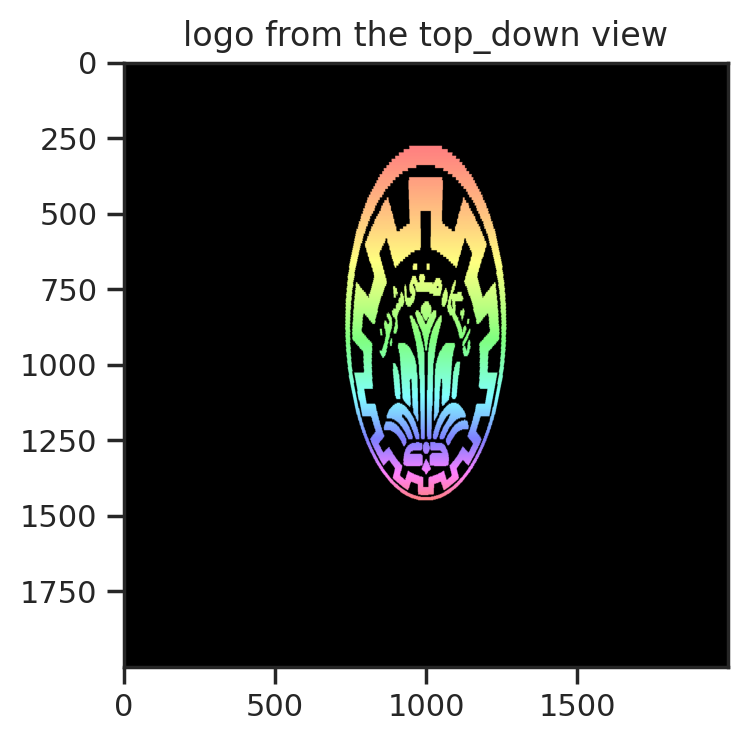

In [ ]:
homo=norimilize_matrix(logo,homograpgy_matrix)
homo/=homo[2,2]
dst=cv2.warpPerspective(logo, homo, (2000, 2000), cv2.INTER_NEAREST, cv2.BORDER_CONSTANT, 0)
# Show the image
plt.imshow(dst.astype(np.uint8))
plt.title(r"logo from the top_down view")
plt.show()
plt.imsave("final.jpg",dst.astype(np.uint8))